In [1]:
# Carregar Bibliotecas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Carregar Dados
dados = pd.read_csv('dados-gerais-das-reclamacoes-por-operadora.csv', sep=';', encoding='latin-1')
dados = pd.DataFrame(dados)
display(dados)

,Registro ANS,Razão Social,Beneficiários,Número Demanda,Data Atendimento,Classificação,Natureza Demanda,Subtema Demanda,Competência,Data de Atualização
0,326305,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,5120557,5484808,04/01/2022 09:26,EM ANDAMENTO,Não Assistencial,Itens Obrigatórios e Cláusulas Contratuais,202208,13/09/2022 10:42
1,326305,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,5120557,5502360,14/01/2022 18:23,EM ANDAMENTO,Não Assistencial,Mensalidade ou Contraprestação Pecuniária,202208,13/09/2022 10:42
2,302091,SÃO FRANCISCO SISTEMAS DE SAÚDE SOCIEDADE EMPR...,0,5502596,16/01/2022 12:50,EM ANDAMENTO,Não Assistencial,Mensalidade ou Contraprestação Pecuniária,202208,13/09/2022 10:42
3,326305,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,5120557,5506224,18/01/2022 14:50,EM ANDAMENTO,Não Assistencial,Mensalidade ou Contraprestação Pecuniária,202208,13/09/2022 10:42
4,326305,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,5120557,5509106,20/01/2022 08:09,EM ANDAMENTO,Não Assistencial,Itens Obrigatórios e Cláusulas Contratuais,202208,13/09/2022 10:42
...,...,...,...,...,...,...,...,...,...,...
252130,421154,SAÚDE BRASIL ASSISTÊNCIA MÉDICA LTDA.,53887,5804499,22/08/2022 09:42,INATIVA,Assistencial,Gerenciamento das Ações de Saúde por Parte da ...,202208,13/09/2022 10:42
252131,421154,SAÚDE BRASIL ASSISTÊNCIA MÉDICA LTDA.,53887,5806653,23/08/2022 09:07,INATIVA,Assistencial,Gerenciamento das Ações de Saúde por Parte da ...,202208,13/09/2022 10:42
252132,353353,UNIMED TERESINA - COOPERATIVA DE TRABALHO MÉDICO,110146,5806982,23/08/2022 10:32,INATIVA,Assistencial,Reembolso,202208,13/09/2022 10:42
252133,303267,UNIMED JUNDIAI - COOPERATIVA DE TRABALHO MÉDICO,97188,5808778,23/08/2022 21:19,INATIVA,Assistencial,Rol de Procedimentos e Coberturas (geográfica ...,202208,13/09/2022 10:42


In [11]:
# ETL dos Dados: Identificando diferença entre linhas e colunas
etl1 = dados.count()
etl2 = dados.Classificação.value_counts(dropna=False)
display(etl1, etl2)


Registro ANS           252135
Razão Social           252135
Beneficiários          252135
Número Demanda         252135
Data Atendimento       252135
Classificação          245807
Natureza Demanda       252135
Subtema Demanda        252128
Competência            252135
Data de Atualização    252135
dtype: int64

INATIVA         186828
EM ANDAMENTO     27285
NP               15769
NÚCLEO           11869
NaN               6328
RVE               4056
Name: Classificação, dtype: int64

In [40]:
# Zerando valores NAN e filtrando para igualar as linhas
df = dados.fillna(0)
df = df[df['Classificação'] != 0]
display(df['Classificação'].value_counts(dropna=False), df.count())


INATIVA         186828
EM ANDAMENTO     27285
NP               15769
NÚCLEO           11869
RVE               4056
Name: Classificação, dtype: int64

Registro ANS           245807
Razão Social           245807
Beneficiários          245807
Número Demanda         245807
Data Atendimento       245807
Classificação          245807
Natureza Demanda       245807
Subtema Demanda        245807
Competência            245807
Data de Atualização    245807
dtype: int64

In [57]:
# Fazendo o drop de colunas nao necessarias
df1 = df.drop(df.columns[[0,2,3,5,6,7,8,9]], axis=1)
df1.head()

,Razão Social,Data Atendimento
0,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,04/01/2022 09:26
1,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,14/01/2022 18:23
2,SÃO FRANCISCO SISTEMAS DE SAÚDE SOCIEDADE EMPR...,16/01/2022 12:50
3,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,18/01/2022 14:50
4,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,20/01/2022 08:09


In [59]:
# Definindo as datas
df1['Data Atendimento'] = pd.to_datetime(df1['Data Atendimento'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245807 entries, 0 to 252134
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Razão Social      245807 non-null  object        
 1   Data Atendimento  245807 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.6+ MB


In [80]:
# Definindo variaveis dos graficos
razao = [i for i in df1['Razão Social'].value_counts() if i > 1000]

display(razao)

[34818,
 31608,
 19375,
 18761,
 13115,
 10011,
 9878,
 3391,
 3000,
 2748,
 2549,
 2215,
 2193,
 2138,
 2060,
 2031,
 2027,
 1908,
 1865,
 1818,
 1776,
 1717,
 1648,
 1644,
 1560,
 1540,
 1534,
 1407,
 1377,
 1316,
 1243,
 1182,
 1138,
 1113,
 1107,
 1075,
 1072,
 1072,
 1051,
 1049]

([<matplotlib.patches.Wedge at 0x19d2c551ac0>,
 [Text(0.9299549155587716, 0.5875234931711907, ''),
  Text(-0.07433463388440534, 1.0974854724347252, ''),
  Text(-0.8566333657326463, 0.6900574445026724, ''),
  Text(-1.0979566917848342, 0.06701569193034322, ''),
  Text(-0.9881422119009112, -0.483295943557956, ''),
  Text(-0.7430672013861658, -0.8110802267495686, ''),
  Text(-0.44833706948533875, -1.0044868700611764, ''),
  Text(-0.22399940316274305, -1.0769513765174057, ''),
  Text(-0.11161708106244592, -1.094322451206727, ''),
  Text(-0.009487951201825755, -1.0999590805034485, ''),
  Text(0.08472103543113323, -1.0967325773202312, ''),
  Text(0.16893877870413906, -1.0869497178112493, ''),
  Text(0.24598025507780807, -1.072144446477179, ''),
  Text(0.32045958122236556, -1.0522859197018586, ''),
  Text(0.391153424143029, -1.028104566073502, ''),
  Text(0.4583118303427284, -0.9999751327747598, ''),
  Text(0.5229454457775767, -0.9677437991227285, ''),
  Text(0.5834696270872731, -0.93250372345

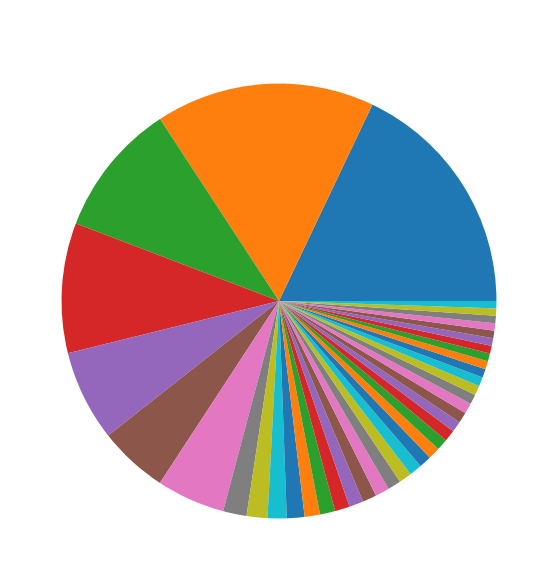

In [81]:
# Grafico pizza
plt.figure(figsize=(10,10))
plt.title('Grafico de empresas', fontsize=22, color='white')
plt.pie(razao)
